In [1]:
# !pip install opencv-contrib-python


In [2]:

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


In [3]:
# box filter
k_size = 5
kernel = np.ones((k_size,k_size),np.float32)
kernel = kernel/30

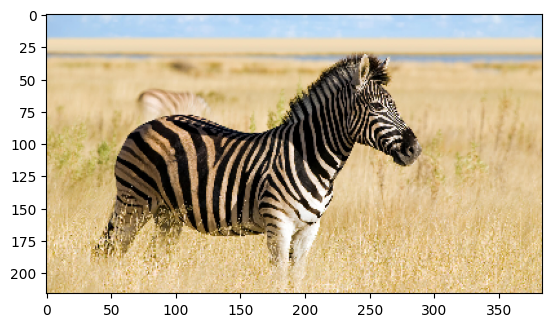

In [11]:
img = cv.imread("zebra.jpg")
h,w,d = img.shape   
img = cv.resize(img,(w//5,h//5))
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

## Manual

In [6]:
def ProcessKernel(arr1,kernel):
    h,w = kernel.shape
    # print(kernel.shape)
    # print(arr1.shape)
    sum = 0
    for i in range(h):
        for j in range(w):
            # print(i,j)
            sum += arr1[i,j]*kernel[i,j]
    return sum

In [12]:
from copy import deepcopy
new_img = deepcopy(img)
new_img = cv.cvtColor(new_img,cv.COLOR_BGR2RGB)
h,w,d = img.shape
# print(w,h,d)
# print(k_size)
img_convolution = np.zeros_like(new_img)
# print(img_convolution[0][1].shape)
for i in range(w-k_size+1):
    # print("i",i)""
    for j in range(h-k_size+1):
        for k in range(d):

            img_convolution[j][i][k] = ProcessKernel(new_img[j:j+k_size,i:i+k_size,k],kernel)


Text(0.5, 1.0, 'img box filtered')

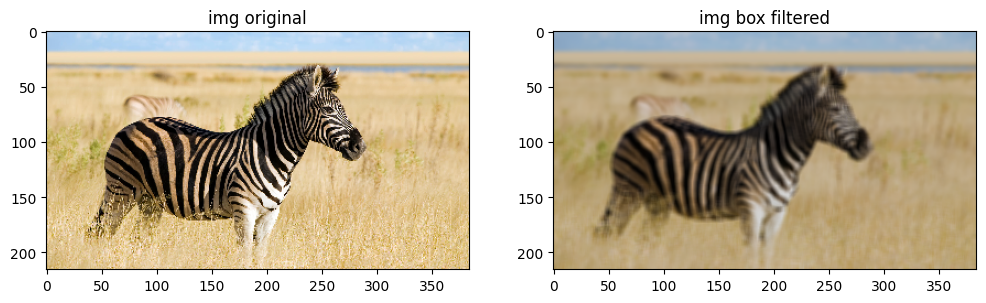

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(new_img)
ax[0].set_title("img original")
ax[1].imshow(img_convolution)
ax[1].set_title("img box filtered")

## Opencv Method /function

(216, 384, 3)


Text(0.5, 1.0, 'img box filtered')

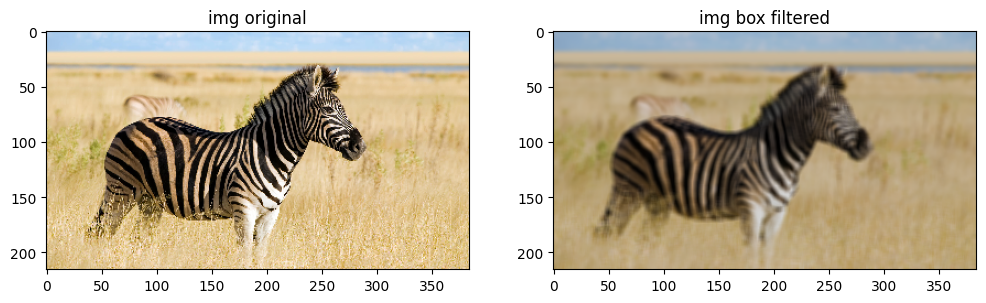

In [18]:
print(img.shape)
img_convolution = cv.filter2D(new_img,-1,kernel)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(new_img)
ax[0].set_title("img original")
ax[1].imshow(img_convolution)
ax[1].set_title("img box filtered")

OTHER KERNELS

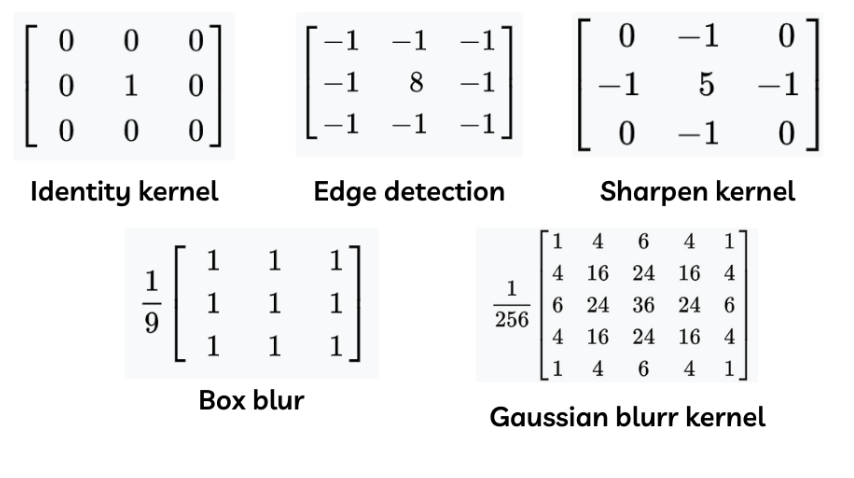

and many others..